In [1]:
import gvar as gv
import numpy as np
import scipy.optimize as so

import matplotlib.pyplot as plt
import matplotlib as mpl
import view_gluon

import utils
import gluon

utils.set_mplstyle()

renorm_mu = -58

escale = 1.7606
Tc = 167

In [2]:
def chisquare(y_data,y_obs,y_err,ddof=1):
    """Calculate the chi-square statistic of the fit"""
    
    return np.sum((y_data-y_obs)**2/(y_err**2))/ddof

In [3]:
results = {}

for Nt in [16,24,32,36,48,64,128]: 

    prop = view_gluon.propagator(Nt,n_samples='all',gtype="coulomb")
    print(Nt,len(prop.prop_info))
    q = prop.q
    D = prop.D
    
    # Z3 average
    qz3, Dz3 = prop.Z3_average(q,D)
    
    # _,_ = prop.half_cut()
    
    # Cone cut
    qc, Dc = prop.cone_cut(radius=1)
    
    # Lattice momentum correction
    qi = prop.correct_q(qc,qtype="improved")
    
    # Renormalize
    prop.renormalize()
    
    results[Nt] = {'f':prop.f.copy(), 'D': prop.D.copy(),'alpha':prop.alpha,'q':qi, 'Nconf':len(prop.prop_info), 'chisq': prop.chisq}

16 33


/home/ben/Work/gluon-prop/view_gluon.py:91: RuntimeWarning: divide by zero encountered in divide
  z = p0/norm_p


24 235


/home/ben/Work/gluon-prop/view_gluon.py:91: RuntimeWarning: divide by zero encountered in divide
  z = p0/norm_p


32 450


/home/ben/Work/gluon-prop/view_gluon.py:91: RuntimeWarning: divide by zero encountered in divide
  z = p0/norm_p


36 334


/home/ben/Work/gluon-prop/view_gluon.py:91: RuntimeWarning: divide by zero encountered in divide
  z = p0/norm_p


48 224


/home/ben/Work/gluon-prop/view_gluon.py:91: RuntimeWarning: divide by zero encountered in divide
  z = p0/norm_p


64 241


/home/ben/Work/gluon-prop/view_gluon.py:91: RuntimeWarning: divide by zero encountered in divide
  z = p0/norm_p


128 185


/home/ben/Work/gluon-prop/view_gluon.py:91: RuntimeWarning: divide by zero encountered in divide
  z = p0/norm_p


16 0.990(22) 33 0.02635859293(31)
24 0.997(13) 235 0.004144684679(13)
32 0.9995(93) 450 0.00201183728(65)
36 0.9978(80) 334 0.0029664296520(16)
48 1.0003(57) 224 0.0049867740471(35)
64 1.0000(42) 241 0.00447817382477(54)
128 0.9992(20) 185 0.005059278093(29)


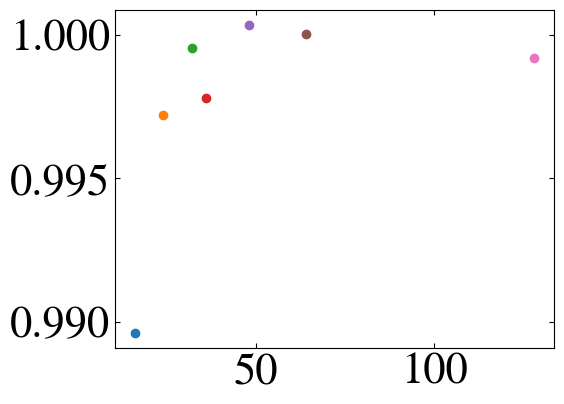

In [4]:
for Nt in results.keys():
    print(Nt, results[Nt]['alpha'] , results[Nt]['Nconf'], results[Nt]['chisq'])
    plt.scatter(Nt,results[Nt]['alpha'].mean)

Text(0.5, 0, '$|p|$ (GeV)')

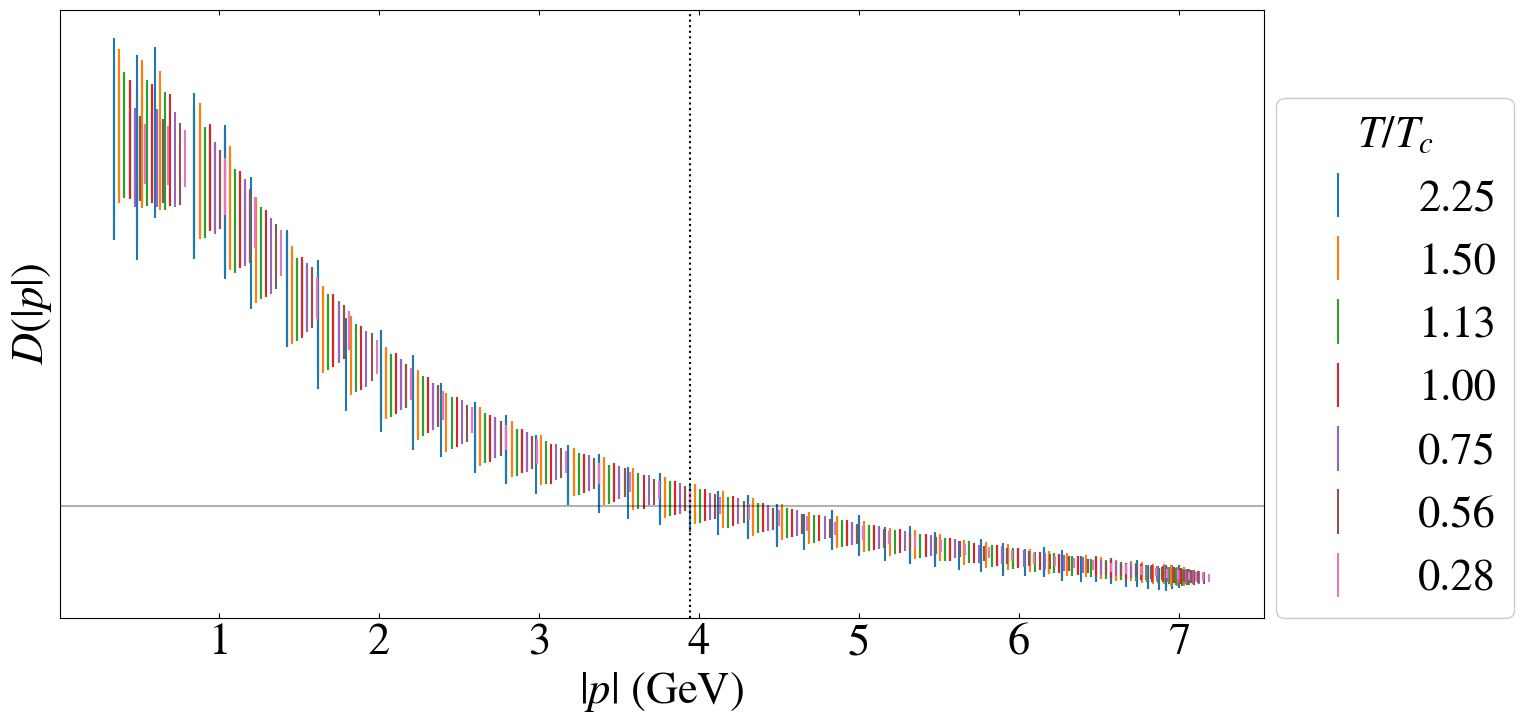

In [5]:
plt.figure(figsize=(16,8))
for pos,Nt in enumerate(results.keys()):
    q = results[Nt]['q'].copy()
    q = np.asarray([np.linalg.norm(qi[1:]) for qi in q[q[:,0]==0][1:]])
    D = results[Nt]['f'].copy()
    
    mu = q[renorm_mu]
    
    Z = 1/(D[renorm_mu]*mu*2)
    
    D *= Z
    
    label = f"{np.ceil(utils.to_gev(1/Nt,shift=0)*1000)/Tc:.2f}"
    
    plt.errorbar(utils.to_gev(q+0.018*pos,scale=escale,shift=0),np.asarray([d.mean for d in D]),[d.sdev for d in D],label=label,ls='')
    
ax = plt.gca()
ax.axvline(utils.to_gev(mu,scale=escale,shift=0),0,1,ls=':',c='k')
ax.axhline(1/(2*mu),0,1,c='k',alpha=0.3)
    
plt.legend(loc=(1.01,0),title='$T/T_c$')
plt.ylabel('$D(|p|)$')
plt.yticks([])
plt.xlabel('$|p|$ (GeV)')


## Test tree level behaviour

16 0.744(85)
24 0.753(71)
32 0.745(62)
36 0.745(58)
48 0.745(51)
64 0.741(44)
128 0.744(31)


Text(0.5, 0, '$|p|$ (GeV)')

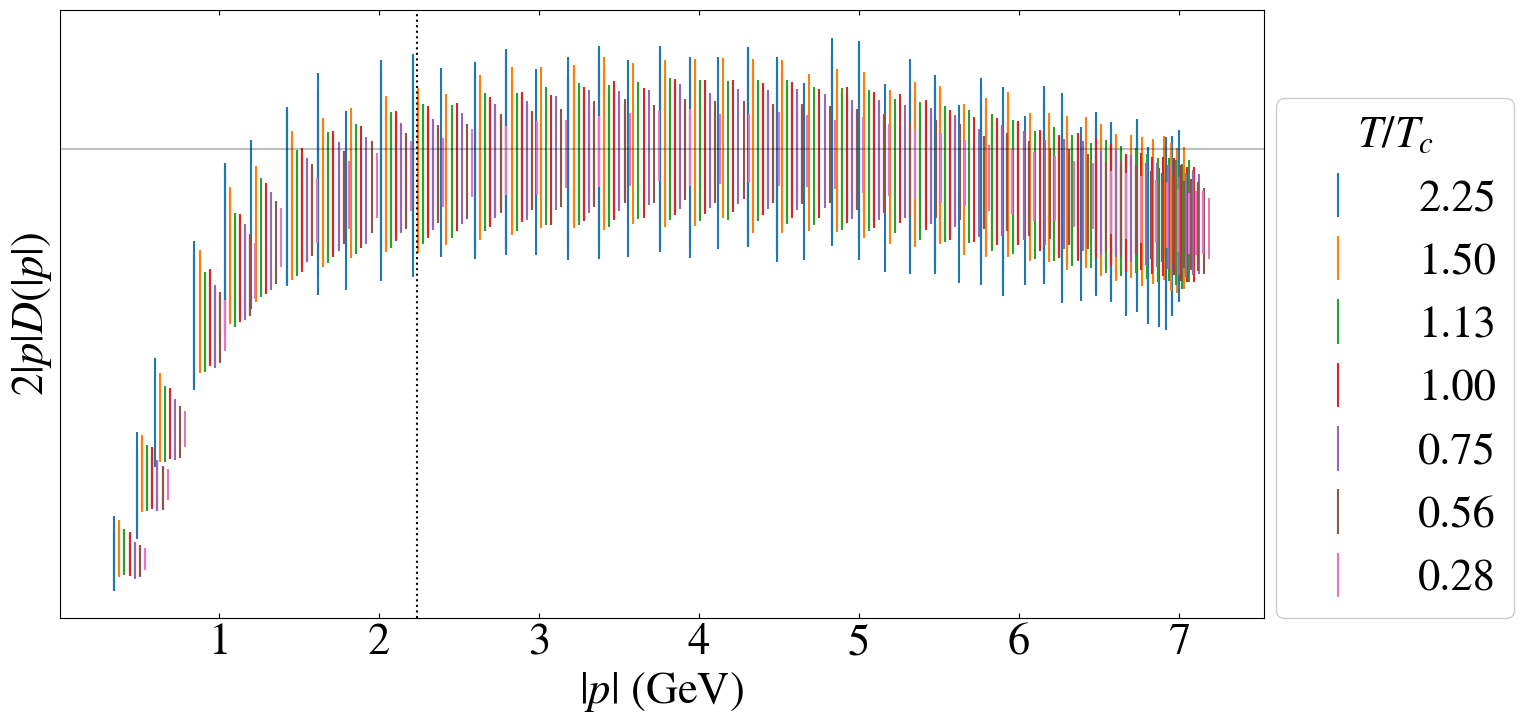

In [6]:
plt.figure(figsize=(16,8))
for pos, Nt in enumerate(results.keys()):
    q = results[Nt]['q'].copy()
    q = np.asarray([np.linalg.norm(qi[1:]) for qi in q[q[:,0]==0][1:]])
    D = results[Nt]['f'].copy()
    
    mu = q[renorm_mu]
    
    Z = 1/(D[renorm_mu]*mu*2)
    print(Nt, Z)
    
    D *= Z
    
    label = f"{np.ceil(utils.to_gev(1/Nt,shift=0)*1000)/Tc:.2f}"
    
    plt.errorbar(utils.to_gev(q+0.018*pos,scale=escale,shift=0),2*q*np.asarray([d.mean for d in D]),2*q*np.asarray([d.sdev for d in D]),label=label,ls='')
    
ax = plt.gca()
ax.axvline(mu,0,1,ls=':',c='k')
ax.axhline(1,0,1,c='k',alpha=0.25)
    
plt.legend(loc=(1.01,0),title='$T/T_c$')
plt.ylabel('$2|p|D(|p|)$')
plt.yticks([])
plt.xlabel('$|p|$ (GeV)')

16 0.744(85)
24 0.753(71)
32 0.745(62)
36 0.745(58)
48 0.745(51)
64 0.741(44)
128 0.744(31)


([], [])

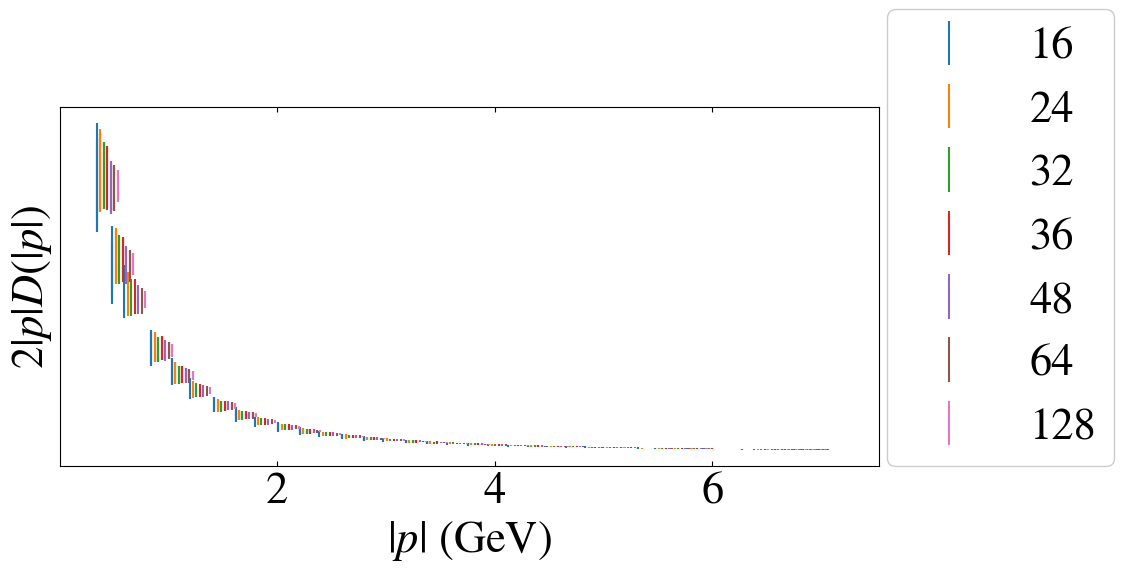

In [7]:
plt.figure(figsize=(12,6))
for pos, Nt in enumerate(results.keys()):
    q = results[Nt]['q'].copy()
    q = np.asarray([np.linalg.norm(qi[1:]) for qi in q[q[:,0]==0][1:]])
    D = results[Nt]['f'].copy()
    
    mu = q[renorm_mu]
    
    Z = 1/(D[renorm_mu]*mu*2)
    print(Nt, Z)
    
    D *= Z
    
    plt.errorbar(utils.to_gev(q+0.018*pos,scale=escale,shift=0),np.asarray([d.mean for d in D])/q,np.asarray([d.sdev for d in D])/q,label=Nt,ls='')
    
ax = plt.gca()
    
plt.legend(loc=(1.01,0))
plt.ylabel('$2|p|D(|p|)$')
plt.xlabel('$|p|$ (GeV)')
plt.yticks([])


# Effective Mass Fitting

In [8]:
def simple_mass(q,M,Z):
    return Z/np.sqrt(q**2 + M**2)

16 0.744(85)
0.09653074143112743
[0.5617709  0.51549755]
24 0.753(71)
0.0757255174755911
[0.5430785  0.51449765]
32 0.745(62)
6.649592286411624
[0.55920907 0.51535863]
36 0.745(58)
21.94519792889596
[0.55867129 0.51532954]
48 0.745(51)
13.201194828269712
[0.57902738 0.51644887]
64 0.741(44)
0.21248916864752115
[0.58360767 0.51670591]
128 0.744(31)
14.957841144165322
[0.57540518 0.51624694]


Text(0.5, 0, '$|p|$')

/home/ben/anaconda3/envs/gluprop/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  func(*args, **kwargs)
/home/ben/anaconda3/envs/gluprop/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


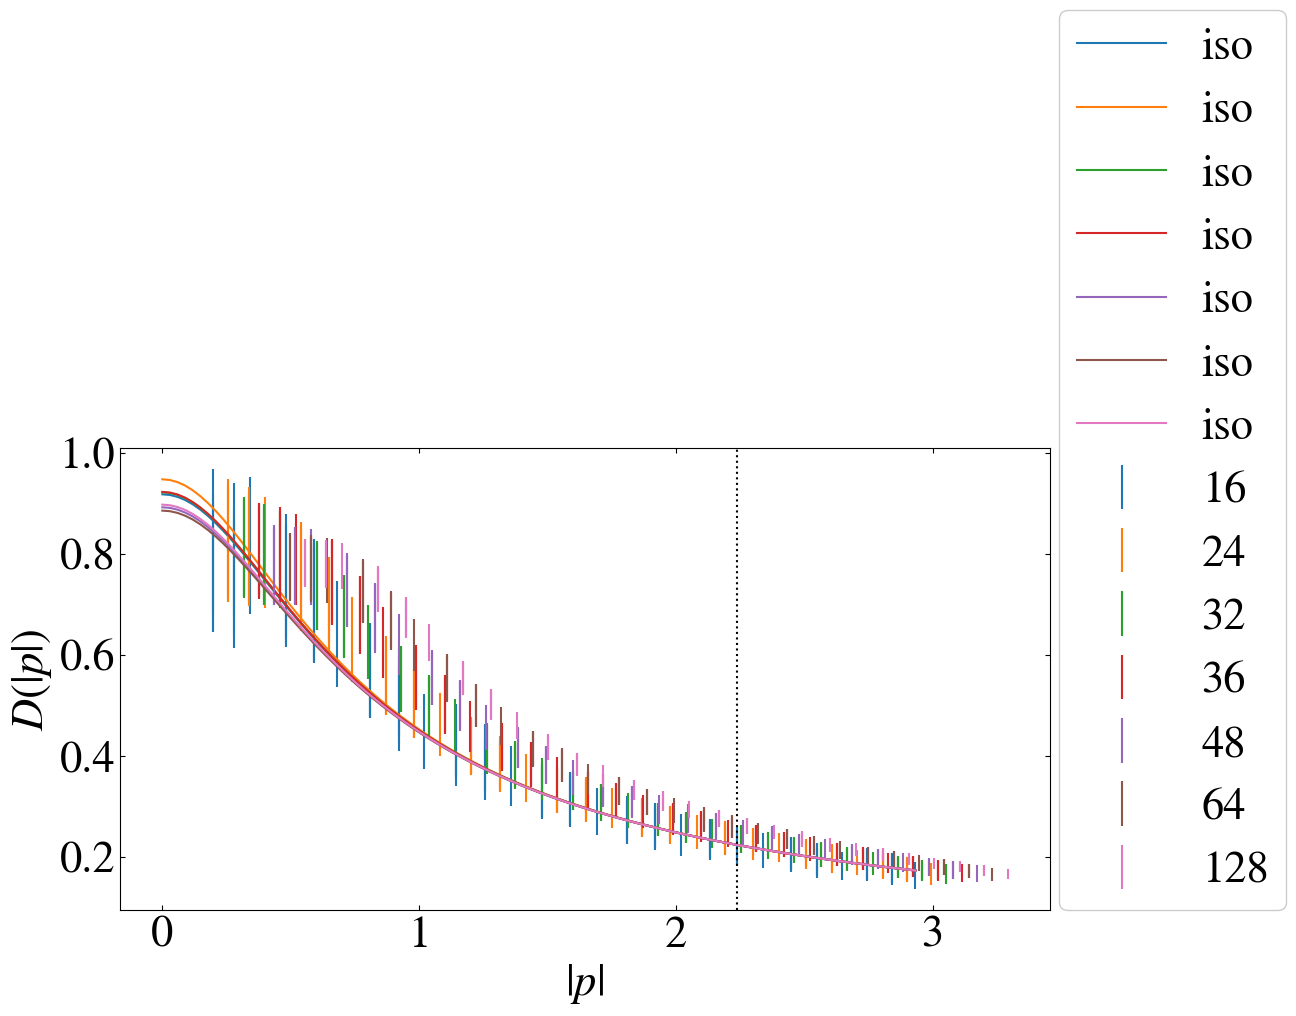

In [9]:
plt.figure(figsize=(12,6))
for pos, Nt in enumerate(results.keys()):
    q = results[Nt]['q'].copy()
    q = np.asarray([np.linalg.norm(qi[1:]) for qi in q[q[:,0]==0][1:]])
    D = results[Nt]['f'].copy()
    
    mu = q[renorm_mu]
    
    Z = 1/(D[renorm_mu]*mu*2)
    
    D *= Z
    
    print(Nt,Z)    
    fit_cut = q < 3
    
    q = q[fit_cut]
    D = D[fit_cut]

    y = np.asarray([d.mean for d in D])
    y_err = np.asarray([d.sdev for d in D])
    
    plt.errorbar(q+0.06*pos,y,y_err,label=Nt,ls='')
    
    iso_popt,iso_pcov = so.curve_fit(simple_mass,q,y,sigma=y_err,absolute_sigma=True)    
    iso_chisq = chisquare(y,simple_mass(q,*iso_popt),y_err,ddof=len(q)-2)
    print(iso_chisq)
    
    plot_q = np.linspace(0,max(q),100)
    
    print(iso_popt)
    plt.plot(plot_q,simple_mass(plot_q,*iso_popt),c=f"C{pos}",label='iso')
    #plt.plot(plot_q,simple_mass(plot_q,*[0.5,0.6]),c=f"C{pos}",label='iso')
    
plt.legend()
    
ax = plt.gca()
ax.axvline(mu,0,1,ls=':',c='k')
    
plt.legend(loc=(1.01,0))
plt.ylabel('$D(|p|)$')
plt.xlabel('$|p|$')

## $q_{max}$ fitting

/tmp/ipykernel_3711142/3899185184.py:40: RuntimeWarning: invalid value encountered in sqrt
  popt = gv.gvar(iso_popt,np.sqrt(np.diag(iso_pcov)))


Text(0.5, 0, '$|p|$')

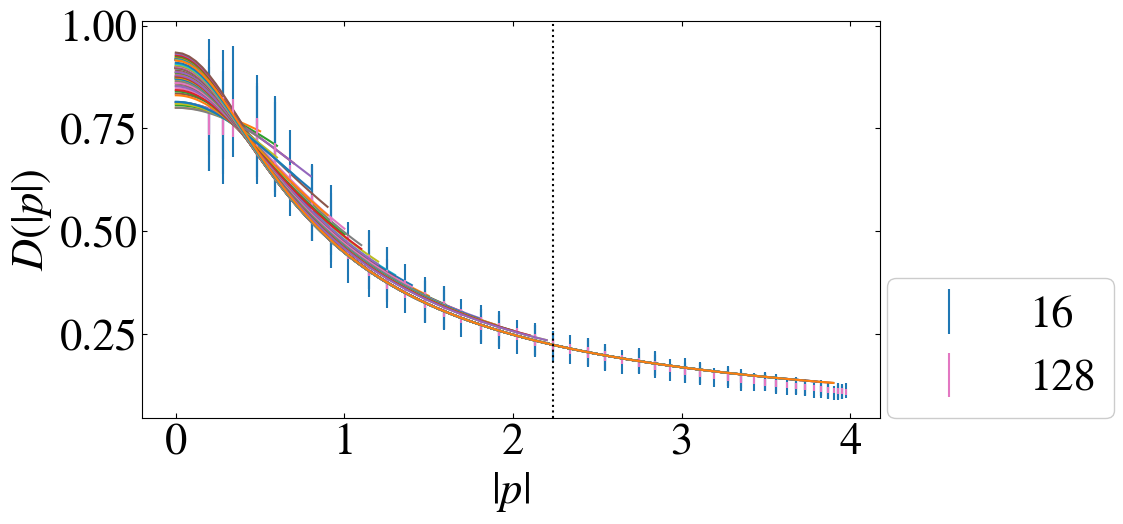

In [10]:
qmax_results = {}

plt.figure(figsize=(12,6))
for pos, Nt in enumerate([16,128]):
    q = results[Nt]['q'].copy()
    q = np.asarray([np.linalg.norm(qi[1:]) for qi in q[q[:,0]==0][1:]])
    D = results[Nt]['f'].copy()
    
    mu = q[renorm_mu]
    
    Z = 1/(D[renorm_mu]*mu*2)
    
    D *= Z
    
    plt.errorbar(q,[d.mean for d in D],[d.sdev for d in D],label=Nt,ls='')
    
    popts = []
    q_maxs = []
    chisq = []
    
    for q_max in np.arange(0.5,4,0.1):
        fit_cut = q < q_max
    
        qc = q[fit_cut]
        Dc = D[fit_cut]
    
        y = np.asarray([d.mean for d in Dc])
        y_err = np.asarray([d.sdev for d in Dc])
    
        try:
            iso_popt,iso_pcov = so.curve_fit(simple_mass,qc,y,sigma=y_err,absolute_sigma=True)    
            iso_chisq = chisquare(y,simple_mass(qc,*iso_popt),y_err,ddof=len(qc)-2)
            #print(iso_chisq)
    
            plot_q = np.linspace(0,q_max,100)
    
            #print(iso_popt)
            plt.plot(plot_q,simple_mass(plot_q,*iso_popt))
            
            popt = gv.gvar(iso_popt,np.sqrt(np.diag(iso_pcov)))
            
            popts.append(popt)
            q_maxs.append(q_max)
            chisq.append(iso_chisq)
            
        except Exception as e:
            print(e)
    qmax_results[Nt] = {'popt':popts,'q_max':q_maxs,'chisq':chisq}
    
plt.legend()
    
ax = plt.gca()
ax.axvline(mu,0,1,ls=':',c='k')
    
plt.legend(loc=(1.01,0))
plt.ylabel('$D(|p|)$')
plt.xlabel('$|p|$')

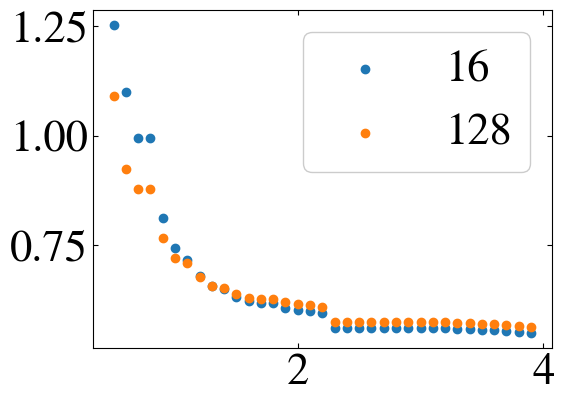

In [11]:
for Nt in qmax_results.keys():
    popts = qmax_results[Nt]['popt']
    qmax = qmax_results[Nt]['q_max']
    
    plt.scatter(qmax,[p[0].mean for p in popts],label=Nt)
plt.legend()

In [12]:
def iso_gribov(p,M,Z):
    return Z/np.sqrt(p**4 + M**4)

def aniso_gribov(p,M,Z,gamma,alpha):
    return Z/np.sqrt(p**4 + gamma*M**2/p**2 + alpha * M**3*p + M**4)

16 0.744(85)
0.08333994089349872 0.007528970266206498
[0.37274205 0.47374503] [ 0.29626082  0.49588923 -0.00460093  3.21457514]
24 0.753(71)
Could not fit aniso_gribov propagator:  Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
0.12650893343551525 0.009660316497572423
[0.36210598 0.47240609] [ 0.29626082  0.49588923 -0.00460093  3.21457514]
32 0.745(62)
Could not fit aniso_gribov propagator:  Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
0.18266909185294763 0.011155555172588323
[0.36384424 0.46615663] [ 0.29626082  0.49588923 -0.00460093  3.21457514]
36 0.745(58)
Could not fit aniso_gribov propagator:  Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
0.19442723730917985 0.009097714519224913
[0.3649323  0.46856778] [ 0.29626082  0.49588923 -0.00460093  3.21457514]
48 0.745(51)
Could not fit aniso_gribov propagator:  Optimal parameters not found: Number of calls to function ha

/tmp/ipykernel_3711142/1233957098.py:5: RuntimeWarning: invalid value encountered in sqrt
  return Z/np.sqrt(p**4 + gamma*M**2/p**2 + alpha * M**3*p + M**4)


Text(0.5, 0, '$|p|$')

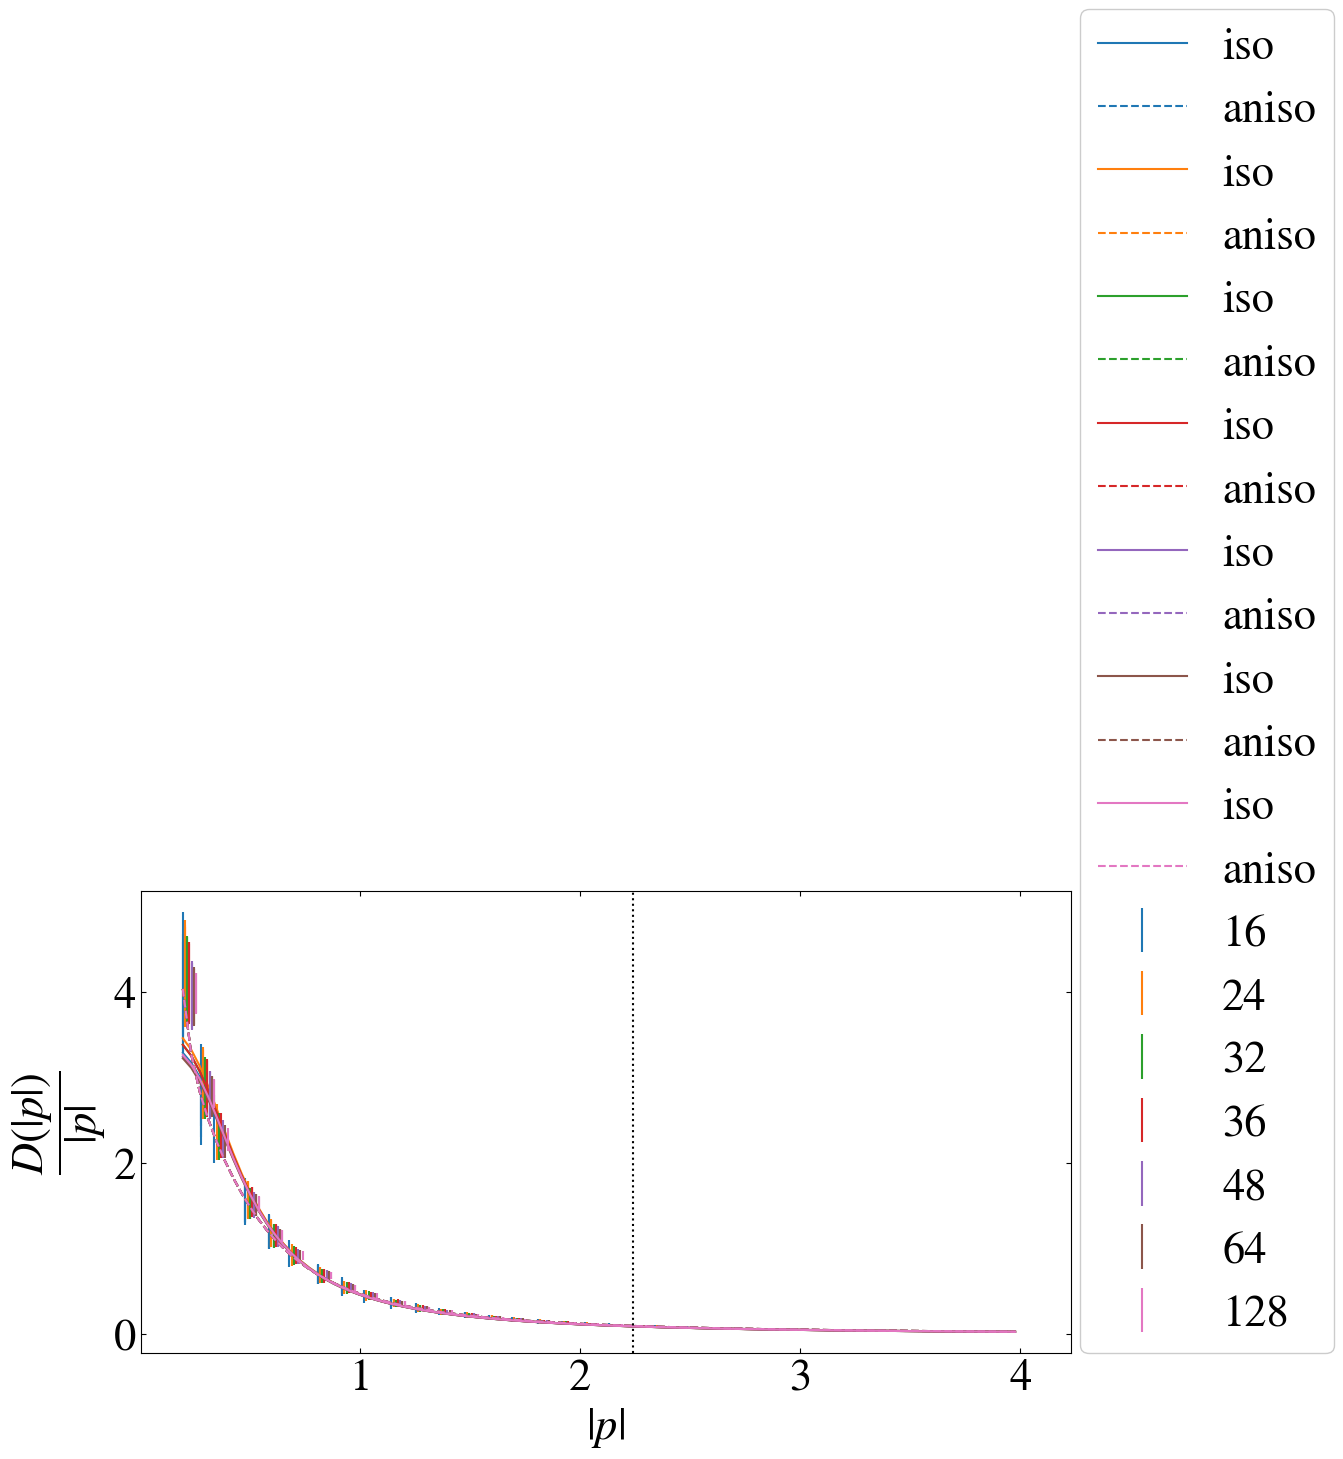

In [13]:
gribov_results = {}

plt.figure(figsize=(12,6))
for pos, Nt in enumerate(results.keys()):
    q = results[Nt]['q'].copy()
    q = np.asarray([np.linalg.norm(qi[1:]) for qi in q[q[:,0]==0][1:]])
    D = results[Nt]['f'].copy()
    
    mu = q[renorm_mu]
    
    Z = 1/(D[renorm_mu]*mu*2)
    
    D *= Z
    
    print(Nt,Z)    
    fit_cut = q < 2
    
    y = np.asarray([d.mean for d in D])/q
    y_err = np.asarray([d.sdev for d in D])/q
    
    plt.errorbar(q+0.01*pos,y,y_err,label=Nt,ls='')
    
    try:
        iso_popt,iso_pcov = so.curve_fit(iso_gribov,q[fit_cut],y[fit_cut],sigma=y_err[fit_cut],absolute_sigma=True)
    except Exception as e:
        print("Could not fit iso_gribov propagator: ",e)
    try:
        aniso_popt,aniso_pcov =  so.curve_fit(aniso_gribov,q[fit_cut],y[fit_cut],sigma=y_err[fit_cut],absolute_sigma=True)
    except Exception as e:
        print("Could not fit aniso_gribov propagator: ",e)
    
    iso_chisq = chisquare(y[fit_cut],iso_gribov(q,*iso_popt)[fit_cut],y_err[fit_cut],ddof=len(q)-2)
    aniso_chisq = chisquare(y[fit_cut],aniso_gribov(q,*aniso_popt)[fit_cut],y_err[fit_cut],ddof=len(q)-4)
    print(iso_chisq,aniso_chisq)
    
    plot_q = np.linspace(min(q),max(q),100)
    
    print(iso_popt,aniso_popt)
    plt.plot(plot_q,iso_gribov(plot_q,*iso_popt),c=f"C{pos}",label='iso')
    plt.plot(plot_q,aniso_gribov(plot_q,*aniso_popt),ls='--',c=f"C{pos}",label='aniso')
    
    gv_iso_popt = gv.gvar(iso_popt,np.sqrt(np.diag(iso_pcov)))
    gv_aniso_popt = gv.gvar(aniso_popt,np.sqrt(np.diag(aniso_pcov)))

    
    gribov_results[Nt] = {'iso_popt':gv_iso_popt,
                          'aniso_popt':gv_aniso_popt,
                          'iso_chisq':iso_chisq,
                          'aniso_chisq':aniso_chisq}
plt.legend()
    
ax = plt.gca()
ax.axvline(mu,0,1,ls=':',c='k')
    
plt.legend(loc=(1.01,0))
plt.ylabel('$\dfrac{D(|p|)}{|p|}$')
plt.xlabel('$|p|$')

[0.373(17) 0.474(14)] [0.30(44) 0.496(21) -0.0046(38) 3(19)]
[0.362(14) 0.472(12)] [0.30(44) 0.496(21) -0.0046(38) 3(19)]
[0.364(12) 0.466(10)] [0.30(44) 0.496(21) -0.0046(38) 3(19)]
[0.365(12) 0.4686(95)] [0.30(44) 0.496(21) -0.0046(38) 3(19)]
[0.373(10) 0.4679(83)] [0.30(44) 0.496(21) -0.0046(38) 3(19)]
[0.3737(88) 0.4667(72)] [0.30(44) 0.496(21) -0.0046(38) 3(19)]
[0.3722(61) 0.4691(51)] [0.30(44) 0.496(21) -0.0046(38) 3(19)]


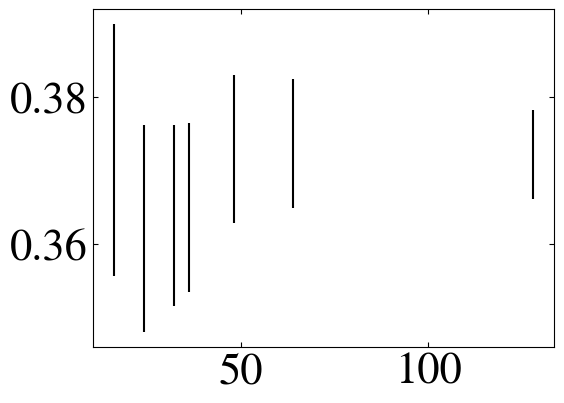

In [14]:
for Nt in gribov_results.keys():
    iso_popt = gribov_results[Nt]['iso_popt']
    aniso_popt = gribov_results[Nt]['aniso_popt']
    print(iso_popt,aniso_popt)
    plt.errorbar(Nt,abs(iso_popt[0].mean), iso_popt[0].sdev,c='k')
    #plt.errorbar(Nt,aniso_popt[0].mean, aniso_popt[0].sdev,c='r')

Text(0.5, 0, '$|p|$ (GeV)')

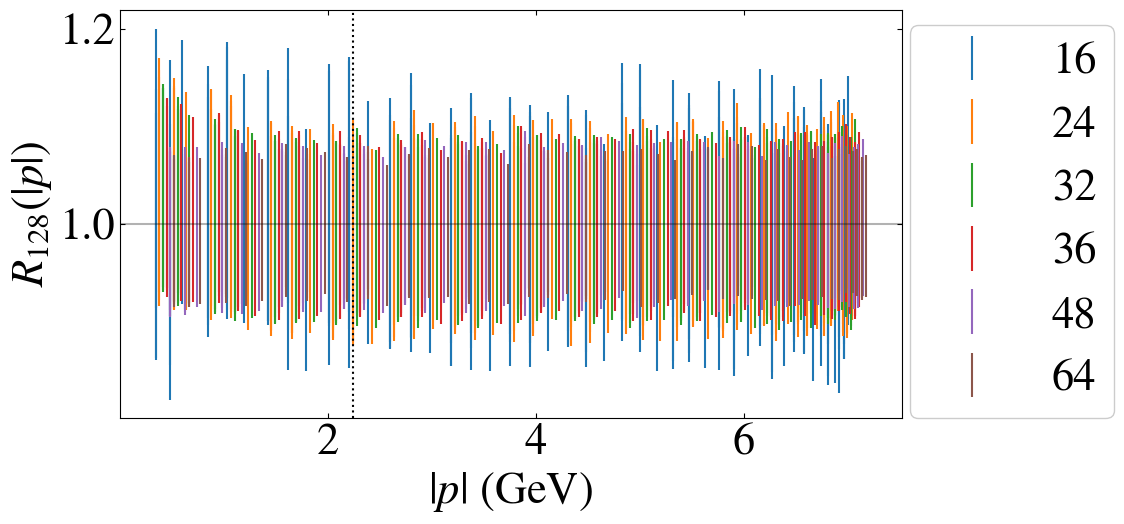

In [15]:
plt.figure(figsize=(12,6))
for pos,Nt in enumerate(results.keys()):
    if Nt == 128:
        continue
    q = results[Nt]['q'].copy()
    q = np.asarray([np.linalg.norm(qi[1:]) for qi in q[q[:,0]==0][1:]])
    D = results[Nt]['f'].copy()
    D_128 = results[128]['f'].copy()
    
    mu = q[renorm_mu]
    
    Z = 1/(D[renorm_mu]*mu*2)
    Z_128 = 1/(D_128[renorm_mu]*mu*2)
    
    D *= Z
    D_128 *= Z
    
    R = D/D_128
    
    plt.errorbar(utils.to_gev(q+0.02*pos,scale=escale,shift=0),np.asarray([d.mean for d in R]),[d.sdev for d in R],label=Nt,ls='')
    
ax = plt.gca()
ax.axvline(mu,0,1,ls=':',c='k')
ax.axhline(1,0,1,c='k',alpha=0.3)
    
plt.legend(loc=(1.01,0))
plt.ylabel('$R_{128}(|p|)$')
plt.xlabel('$|p|$ (GeV)')
